# Release Date's Influence on a Movie's Success

The timing of a movie's release plays a crucial role in its commercial performance and critical reception. Certain seasons, such as summer and the holiday period, are traditionally seen as more favorable for movie releases, with the potential for higher box office earnings and increased audience engagement. The question arises: Do movies released during these peak times tend to earn more revenue or receive better ratings from critics and audiences? 

In this section, we will explore the impact of release dates on a movie's success, focusing on how seasonality—whether movies are released in summer, during the holiday season, or in off-peak months—can influence box office performance and ratings. By analyzing trends in movie releases and comparing the performance of films across different seasons, we aim to uncover patterns that may explain the seasonal effects on a film's overall success.








To start, let us first load the movie_scores pickle created by the budget.ipynb:

In [116]:
# For dataframe manipulation 
import pandas as pd
import pickle

# For visualizations
import matplotlib.pyplot as plt
import seaborn as sns

In [117]:
with open('movie_scores.pkl', 'rb') as file:
    df_movie_scores = pickle.load(file)

df_movie_scores.head()


,movie_name,score_tom,score_meta,score_imdb,budget_x,revenue,box_office,avg_score
0,Ghosts of Mars,NaN,56.0,52.0,28000000.0,14010832.0,14010832.0,54.0
1,Getting Away with Murder: The JonBenét Ramsey ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Brun bitter,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,White Of The Eye,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A Woman in Flames,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now, let us merge this data with the original CMU movie dataset to obtain the release dates:

In [118]:
# Importing the CMU Movies Dataframe that we created in a different pipeline
file_path = "../../pickles/cmu_movies_df.pkl" 
with open(file_path, 'rb') as f:
    df_movies = pickle.load(f)

# For an easier merge process
df_movies = df_movies.rename(columns={'Movie Name': 'movie_name', 'Release Date': 'release_date', 'Country Name':'country'})

df_movies.head()

,Wikipedia Movie ID,Freebase Movie ID,movie_name,release_date,Box Office Revenue,Runtime,Language Freebase ID,Language Name,Country Freebase ID,country,Genre Freebase ID,Genre Name
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[/m/02h40lc],[English Language],[/m/09c7w0],[United States of America],"[/m/01jfsb, /m/06n90, /m/03npn, /m/03k9fj, /m/...","[Thriller, Science Fiction, Horror, Adventure,..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,[/m/02h40lc],[English Language],[/m/09c7w0],[United States of America],"[/m/02n4kr, /m/03bxz7, /m/07s9rl0, /m/0hj3n01]","[Mystery, Biographical film, Drama, Crime Drama]"
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,[/m/05f_3],[Norwegian Language],[/m/05b4w],[Norway],"[/m/0lsxr, /m/07s9rl0]","[Crime Fiction, Drama]"
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,[/m/02h40lc],[English Language],[/m/07ssc],[United Kingdom],"[/m/01jfsb, /m/0glj9q, /m/09blyk]","[Thriller, Erotic thriller, Psychological thri..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,[/m/04306rv],[German Language],[/m/0345h],[Germany],[/m/07s9rl0],[Drama]


In [119]:
# Merging
df_time_merged = pd.merge(df_movie_scores, df_movies[['movie_name', 'release_date', 'country']], how='left', on='movie_name')
df_time_merged.head()

,movie_name,score_tom,score_meta,score_imdb,budget_x,revenue,box_office,avg_score,release_date,country
0,Ghosts of Mars,NaN,56.0,52.0,28000000.0,14010832.0,14010832.0,54.0,2001-08-24,[United States of America]
1,Getting Away with Murder: The JonBenét Ramsey ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000-02-16,[United States of America]
2,Brun bitter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1988,[Norway]
3,White Of The Eye,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1987,[United Kingdom]
4,A Woman in Flames,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1983,[Germany]


From our analysis, we observe that some movies have only the year recorded in their release date. To further explore the seasonal effects of movie releases, we will create a sub-dataframe that includes only the titles with complete release dates.

In [120]:
# Creating a second copy so that to_datetime doesn't make our jutst-year entries NaT in the merged dataframe 
df_full_date_merged = df_time_merged
df_full_date_merged['release_date'] = pd.to_datetime(df_time_merged['release_date'], errors='coerce')

# df_time_merged with full date
df_full_date = df_time_merged[~df_full_date_merged['release_date'].dt.month.isna()]
df_full_date.head()

,movie_name,score_tom,score_meta,score_imdb,budget_x,revenue,box_office,avg_score,release_date,country
0,Ghosts of Mars,NaN,56.0,52.0,28000000.0,14010832.0,14010832.0,54.0,2001-08-24,[United States of America]
1,Getting Away with Murder: The JonBenét Ramsey ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000-02-16,[United States of America]
5,The Gangsters,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1913-05-29,[United States of America]
9,The Sorcerer's Apprentice,NaN,54.0,61.0,160000000.0,217986320.0,NaN,57.5,2010-07-08,[United States of America]
10,Alexander's Ragtime Band,NaN,NaN,NaN,NaN,NaN,3600000.0,NaN,1938-08-16,[United States of America]


Let us add a season column into the full-date movies data frame:

In [124]:
def add_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Unknown'

# Apply the function to create the 'season' column
df_full_date.loc[:, 'season'] = df_full_date['release_date'].dt.month.apply(add_season)

# Now you can filter by season or analyze by season
df_full_date.head()

,movie_name,score_tom,score_meta,score_imdb,budget_x,revenue,box_office,avg_score,release_date,country,season
0,Ghosts of Mars,NaN,56.0,52.0,28000000.0,14010832.0,14010832.0,54.0,2001-08-24,[United States of America],Summer
1,Getting Away with Murder: The JonBenét Ramsey ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000-02-16,[United States of America],Winter
5,The Gangsters,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1913-05-29,[United States of America],Spring
9,The Sorcerer's Apprentice,NaN,54.0,61.0,160000000.0,217986320.0,NaN,57.5,2010-07-08,[United States of America],Summer
10,Alexander's Ragtime Band,NaN,NaN,NaN,NaN,NaN,3600000.0,NaN,1938-08-16,[United States of America],Summer


Now, let us do our visualizations and explore any possible correlations with seasons:

In [125]:
# Counting the number of movies in each season
season_counts = df_full_date.groupby('season')['movie_name'].count().sort_values(ascending=False)
season_counts

season
Fall      11220
Spring     9932
Winter     9629
Summer     8591
Name: movie_name, dtype: int64

season
Fall      63.599609
Spring    63.509509
Summer    63.026642
Winter    64.128199
Name: avg_score, dtype: float64


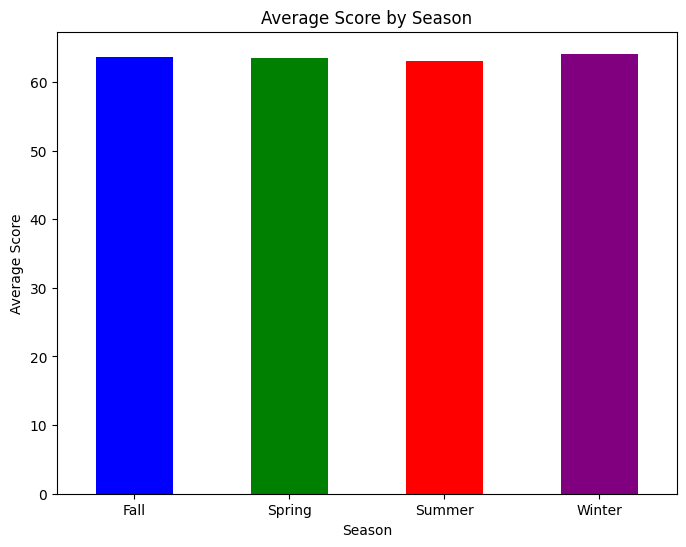

In [126]:
# Calculate the movie average score for each season
avg_score_by_season = df_full_date.groupby('season')['avg_score'].mean()

print(avg_score_by_season)

plt.figure(figsize=(8, 6))
avg_score_by_season.plot(kind='bar', color=['blue', 'green', 'red', 'purple'])
plt.title('Average Score by Season')
plt.xlabel('Season')
plt.ylabel('Average Score')
plt.xticks(rotation=0)
plt.show()


Interesting! The average score across different release seasons being similar suggests that the quality of movies, as assessed by critics and audiences, remains relatively consistent throughout the year. This could be due to filmmakers maintaining high production standards year-round, and critic reviews being primarily based on factors like plot, acting, and direction, which are not influenced by the release season. 

season
Fall      1.656207e+08
Spring    1.716193e+08
Summer    1.832600e+08
Winter    1.678216e+08
Name: revenue, dtype: float64


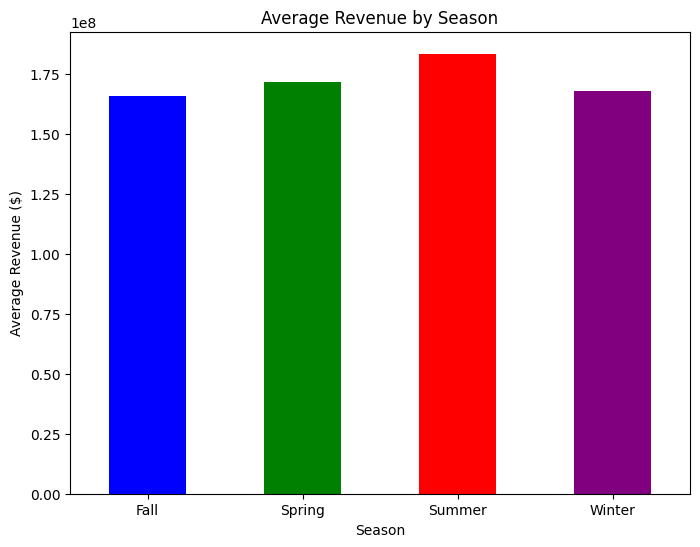

In [127]:
# Calculating the average revenue for each season
avg_revenue_by_season = df_full_date.groupby('season')['revenue'].mean()

print(avg_revenue_by_season)

plt.figure(figsize=(8, 6))
avg_revenue_by_season.plot(kind='bar', color=['blue', 'green', 'red', 'purple'])
plt.title('Average Revenue by Season')
plt.xlabel('Season')
plt.ylabel('Average Revenue ($)')
plt.xticks(rotation=0)
plt.show()


The higher revenue in the summer compared to other seasons can be attributed to several factors, with one key element being the summer blockbuster effect. Movie studios often release their most anticipated films during the summer, when school is out and families are more likely to go to the theater. This results in higher audience turnout and larger box office revenues. 

Spring also sees a fair amount of success due to less competition, as some studios release films earlier in the year to capture the attention of moviegoers before the summer rush. 

Winter sees a decline in revenue, likely because audiences are more focused on the holidays and other festive activities, and fewer major releases are scheduled. 

Fall typically has the lowest revenue as movie releases tend to be fewer, with studios holding back major films for the end of the year to align with award seasons. 

Thus, the seasonality in revenue reflects a combination of audience behavior and strategic timing by film studios.

season
Fall      4.359823e+07
Spring    5.564852e+07
Summer    7.424040e+07
Winter    4.965318e+07
Name: box_office, dtype: float64


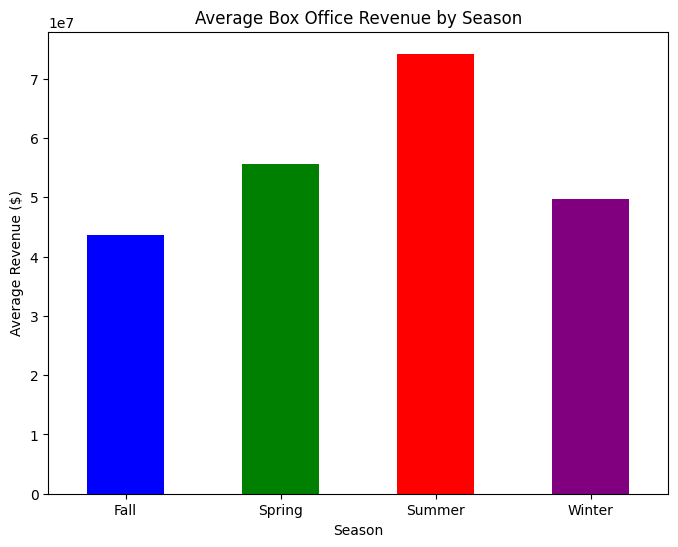

In [128]:
# Calculate the average box office revenue for each season
avg_box_office = df_full_date.groupby('season')['box_office'].mean()

print(avg_box_office)

plt.figure(figsize=(8, 6))
avg_box_office.plot(kind='bar', color=['blue', 'green', 'red', 'purple'])
plt.title('Average Box Office Revenue by Season')
plt.xlabel('Season')
plt.ylabel('Average Revenue ($)')
plt.xticks(rotation=0)
plt.show()

Box office revenues follow the same trend as overall revenue, with the highest earnings observed in the summer and progressively lower earnings in spring, winter, and fall. It's important to note that box office refers specifically to ticket sales at theaters, while total revenue encompasses all income generated by a movie, including box office earnings, home video sales, merchandising, and licensing deals.

Let us take a closer look at the revenue by week:

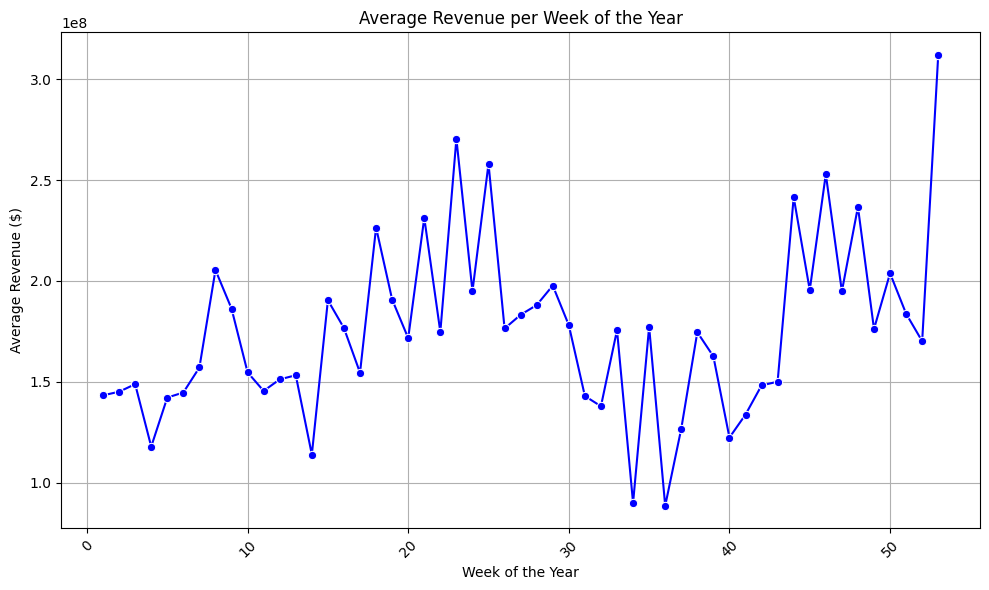

In [131]:
# Extract the week of the year
df_time_merged['week_of_year'] = df_time_merged['release_date'].dt.isocalendar().week

# Group by week_of_year and calculate average revenue
avg_revenue_per_week = df_time_merged.groupby('week_of_year')['revenue'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='week_of_year', y='revenue', data=avg_revenue_per_week, marker='o', color='blue')
plt.title('Average Revenue per Week of the Year')
plt.xlabel('Week of the Year')
plt.ylabel('Average Revenue ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


Analyzing movie revenue week-by-week reveals notable seasonal spikes and dips throughout the year:

- We see a rise around the 8th week (February), likely coinciding with Valentine’s Day—a popular time for romance-themed releases. A more sustained upward trend appears near the 30th week, around late July, which could reflect summer’s impact as schools break and audiences flock to theaters. However, this is followed by a decrease around week 35 as the school year resumes in early September, reducing moviegoing frequency as people shift focus.

- Later in the year, we observe another peak near week 44, which aligns with Halloween. This holiday season often sees the release of horror and thriller genres, boosting box office revenue. 

- The trend holds slightly around weeks 46–48, likely reflecting American Thanksgiving as families gather and seek entertainment.

- Finally, a major spike occurs in December, aligning with Christmas and New Year’s holidays, a prime season for high-grossing releases as people are on holiday break. 

From these results, we see that while summer generally dominates in terms of both average revenue and box office performance, analyzing the impact of specific holidays throughout the year is essential. Strategic releases during these holidays provide opportunities for targeting specific audiences, such as families during Thanksgiving or couples around Valentine's Day. 

Note: It’s important to note that these observations are influenced by U.S. holidays, as American movies dominate the CMU movies dataset.

### Section Conclusion

In conclusion, our exploration of release seasonality and timing highlights the influence of both specific holidays and seasonal trends on movie success. While summer releases generally dominate in terms of average revenue and box office performance due to the broader audience availability, examining spikes during holidays such as Valentine’s Day, Halloween, and the winter holiday season shows the additional impact of these cultural touchpoints. These findings suggest that both timing and strategic alignment with major holidays can be leveraged to maximize a movie's reach and revenue potential. 

Furthermore, although it would be intriguing to analyze the count of movies by country over time to observe any potential shifts in global cinematic trends, we anticipate that the results might not be as revealing given the unbalanced nature of our dataset, which is heavily dominated by American movies. This imbalance limits our ability to draw broad international insights, as any trends we observe may reflect U.S. film production patterns more than global ones. However, this approach could still offer valuable context and would be a worthwhile addition to consider for our final deliverable.